accuracy on train data using gini: 1.0
accuracy on test data using gini: 0.9473684210526315
accuracy on train data using entropy: 1.0
accuracy on test data using entropy: 0.9473684210526315
accuracy on train data using entropy: 0.9642857142857143
accuracy on test data using entropy: 0.9473684210526315


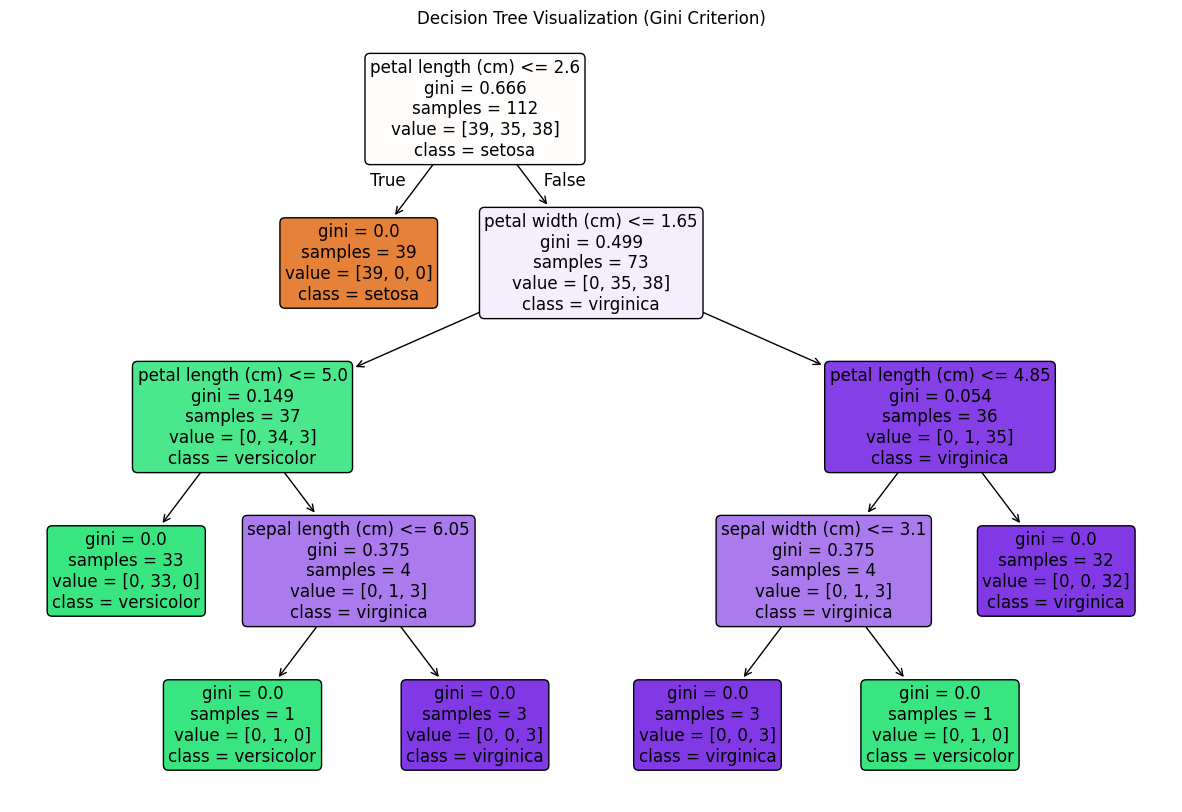

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.25)

# default criterion gini
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print('accuracy on train data using gini:', accuracy_score(y_train, classifier.predict(x_train)))
print('accuracy on test data using gini:', accuracy_score(y_test, y_pred))

# entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(x_train, y_train)
y_pred_entropy = classifier_entropy.predict(x_test)

print('accuracy on train data using entropy:', accuracy_score(y_train, classifier_entropy.predict(x_train)))
print('accuracy on test data using entropy:', accuracy_score(y_test, y_pred_entropy))

# entropy with min_samples_split
classifier_entropy1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
classifier_entropy1.fit(x_train, y_train)
y_pred_entropy1 = classifier_entropy1.predict(x_test)

print('accuracy on train data using entropy:', accuracy_score(y_true=y_train, y_pred=classifier_entropy1.predict(x_train)))
print('accuracy on test data using entropy:', accuracy_score(y_true=y_test, y_pred=y_pred_entropy1))

# visualize
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization (Gini Criterion)")
plt.show()

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# --------------------------------------
# Step 1: Create & Save Sample Dataset
# --------------------------------------
data = pd.DataFrame({
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

data.to_csv("tennis.csv", index=False)

# --------------------------------------
# Step 2: Load Dataset
# --------------------------------------
data = pd.read_csv("tennis.csv")
print("Dataset:\n", data)

# Separate features (X) and target (y)
X = data.drop("play", axis=1).copy()
y = data["play"]

# --------------------------------------
# Step 3: Encode Categorical Features
# --------------------------------------
le_outlook = LabelEncoder()
X["outlook"] = le_outlook.fit_transform(X["outlook"])

le_temp = LabelEncoder()
X["temp"] = le_temp.fit_transform(X["temp"])

le_humidity = LabelEncoder()
X["humidity"] = le_humidity.fit_transform(X["humidity"])

le_windy = LabelEncoder()
X["windy"] = le_windy.fit_transform(X["windy"])

print("\nEncoded Features (X):\n", X)

# Encode target
le_play = LabelEncoder()
y = le_play.fit_transform(y)
print("\nEncoded Target (y):\n", y)

# --------------------------------------
# Step 4: Train-Test Split
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# --------------------------------------
# Step 5: Train Naive Bayes Classifier
# --------------------------------------
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

# --------------------------------------
# Step 6: Evaluate Model
# --------------------------------------
y_pred = classifier.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=le_play.classes_, zero_division=0))

# --------------------------------------
# Step 7: Predict New Sample
# --------------------------------------
new_sample = np.array([[
    le_outlook.transform(["sunny"])[0],
    le_temp.transform(["hot"])[0],
    le_humidity.transform(["high"])[0],
    le_windy.transform(["False"])[0]
]])

# Wrap array into DataFrame with feature names to avoid warning
new_sample_df = pd.DataFrame(new_sample, columns=X.columns)

prediction = classifier.predict(new_sample_df)
predicted_label = le_play.inverse_transform(prediction)[0]

print("\nPrediction for ('sunny','hot','high','False'):", predicted_label)


Dataset:
      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

Encoded Features (X):
     outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create DataFrame
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham'],
    'message': [
        "Hello, how are you?",
        "Congratulations! You've won a lottery of $1000!",
        "Don't forget our meeting tomorrow.",
        "Your subscription is renewed.",
        "Click here to claim your prize!",
        "See you at the gym later.",
        "Limited time offer! Get your discount now!",
        "Have a great day!"
    ]
}

df = pd.DataFrame(data)

# Features and labels
X = df['message']
y = df['label']

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Vectorize the text data
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Build and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

# Predict on test data
y_pred = model.predict(x_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict a new message
new_message = ['how are you']  # New message to predict
new_message_vectorized = vectorizer.transform(new_message)  # Use the same vectorizer
new_pred = model.predict(new_message_vectorized)
print(f"Predicted label for new message: {new_pred[0]}")


Accuracy: 50.00%

Classification Report:
               precision    recall  f1-score   support

         ham       0.67      0.67      0.67         3
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

Predicted label for new message: ham


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# -----------------------------
# 1. Load Data

# -----------------------------
data = pd.read_csv(&quot;tennis.csv&quot;)
print(&quot;Dataset:\n&quot;, data)
# Separate features (X) and target (y)
X = data.drop(&quot;play&quot;, axis=1).copy()
y = data[&quot;play&quot;]
# -----------------------------
# 2. Encode categorical features
# -----------------------------
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
print(&quot;\nEncoded Features (X):\n&quot;, X_encoded)
# Encode target
le_play = LabelEncoder()
y_encoded = le_play.fit_transform(y)
print(&quot;\nEncoded Target (y):\n&quot;, y_encoded)
# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, stratify=y_encoded,
random_state=42
)
# -----------------------------
# 4. Train model
# -----------------------------
classifier = CategoricalNB()
classifier.fit(X_train, y_train)
# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = classifier.predict(X_test)
print(&quot;\nAccuracy:&quot;, accuracy_score(y_test, y_pred))
print(&quot;\nClassification Report:\n&quot;,
      classification_report(y_test, y_pred,
target_names=le_play.classes_))
# -----------------------------
# 6. Predict new sample using array

# -----------------------------
# New input: (&#39;sunny&#39;,&#39;hot&#39;,&#39;high&#39;,&#39;False&#39;)
new_sample = np.array([[&quot;sunny&quot;, &quot;hot&quot;, &quot;high&quot;, &quot;False&quot;]])
# Transform new sample using the same encoder
new_sample_encoded = encoder.fit_transform(new_sample)
prediction = classifier.predict(new_sample_encoded)
predicted_label = le_play.inverse_transform(prediction)[0]
print(&quot;\nPrediction for (&#39;sunny&#39;,&#39;hot&#39;,&#39;high&#39;,&#39;False&#39;):&quot;,
predicted_label)

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Load Data
# -----------------------------
data = pd.read_csv("tennis.csv")
print("Dataset:\n", data)

# Separate features (X) and target (y)
X = data.drop("play", axis=1).copy()
y = data["play"]

# -----------------------------
# 2. Encode categorical features
# -----------------------------
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
print("\nEncoded Features (X):\n", X_encoded)

# Encode target
le_play = LabelEncoder()
y_encoded = le_play.fit_transform(y)
print("\nEncoded Target (y):\n", y_encoded)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, stratify=y_encoded, random_state=42
)

# -----------------------------
# 4. Train model
# -----------------------------
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = classifier.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_play.classes_))

# -----------------------------
# 6. Predict new sample using array
# -----------------------------
# Important: Pass False as boolean, not as string "False"
new_sample = np.array([["sunny", "hot", "high", False]])

# Use the same encoder to transform the new sample
new_sample_encoded = encoder.transform(new_sample)

# Predict
prediction = classifier.predict(new_sample_encoded)
predicted_label = le_play.inverse_transform(prediction)[0]

print("\nPrediction for ('sunny','hot','high', False):", predicted_label)


Dataset:
      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

Encoded Features (X):
 [[2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]
 [2. 2. 0. 0.]
 [2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [2. 2. 1. 1.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 2. 0. 1.]]

Encoded Target (y):
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   su

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/u

ValueError: Found unknown categories [np.str_('False')] in column 3 during transform

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Load Data
# -----------------------------
data = pd.read_csv("tennis.csv")
print("Dataset:\n", data)

# Fix: Make sure 'windy' is boolean type (if stored as string in CSV)
if data['windy'].dtype == object:
    data['windy'] = data['windy'].map({'True': True, 'False': False})

# Separate features (X) and target (y)
X = data.drop("play", axis=1).copy()
y = data["play"]

# -----------------------------
# 2. Encode categorical features
# -----------------------------
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
print("\nEncoded Features (X):\n", X_encoded)

# Encode target
le_play = LabelEncoder()
y_encoded = le_play.fit_transform(y)
print("\nEncoded Target (y):\n", y_encoded)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, stratify=y_encoded, random_state=42
)

# -----------------------------
# 4. Train model
# -----------------------------
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = classifier.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_play.classes_))

# -----------------------------
# 6. Predict new sample using array
# -----------------------------
# Pass new sample with correct types: last element boolean False (not string)
new_sample = np.array([["sunny", "hot", "high", False]])

# Use transform (not fit_transform) to encode new sample
new_sample_encoded = encoder.transform(new_sample)

# Predict
prediction = classifier.predict(new_sample_encoded)
predicted_label = le_play.inverse_transform(prediction)[0]

print("\nPrediction for ('sunny', 'hot', 'high', False):", predicted_label)


Dataset:
      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

Encoded Features (X):
 [[2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]
 [2. 2. 0. 0.]
 [2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [2. 2. 1. 1.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 2. 0. 1.]]

Encoded Target (y):
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   su

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/u

ValueError: Found unknown categories [np.str_('False')] in column 3 during transform

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = pd.read_csv("tennis.csv")
print("Dataset:\n", data)

# Convert windy to boolean if it's string
if data['windy'].dtype == object:
    data['windy'] = data['windy'].map({'True': True, 'False': False})

# Features and target
X = data.drop("play", axis=1).copy()
y = data["play"]

# Encode features with correct data types
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
print("\nEncoded Features (X):\n", X_encoded)

# Encode target
le_play = LabelEncoder()
y_encoded = le_play.fit_transform(y)
print("\nEncoded Target (y):\n", y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.20, stratify=y_encoded, random_state=42
)

# Train model
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

# Evaluate model
y_pred = classifier.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_play.classes_))

# Predict new sample with correct types
new_sample = np.array([["sunny", "hot", "high", False]])  # False is boolean here

# Transform new sample
new_sample_encoded = encoder.transform(new_sample)

# Predict
prediction = classifier.predict(new_sample_encoded)
predicted_label = le_play.inverse_transform(prediction)[0]
print("\nPrediction for ('sunny', 'hot', 'high', False):", predicted_label)


Dataset:
      outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

Encoded Features (X):
 [[2. 1. 0. 0.]
 [2. 1. 0. 1.]
 [0. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 1.]
 [2. 2. 0. 0.]
 [2. 0. 1. 0.]
 [1. 2. 1. 0.]
 [2. 2. 1. 1.]
 [0. 2. 0. 1.]
 [0. 1. 1. 0.]
 [1. 2. 0. 1.]]

Encoded Target (y):
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   su

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/u

ValueError: Found unknown categories [np.str_('False')] in column 3 during transform